In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df2=pd.read_csv('Rose.csv')

### 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
df2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df2.dtypes

YearMonth     object
Rose         float64
dtype: object

In [5]:
df2=pd.read_csv('Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [6]:
df2.dtypes

Rose    float64
dtype: object

In [7]:
df2.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [8]:
df2.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


<function matplotlib.pyplot.show(close=None, block=None)>

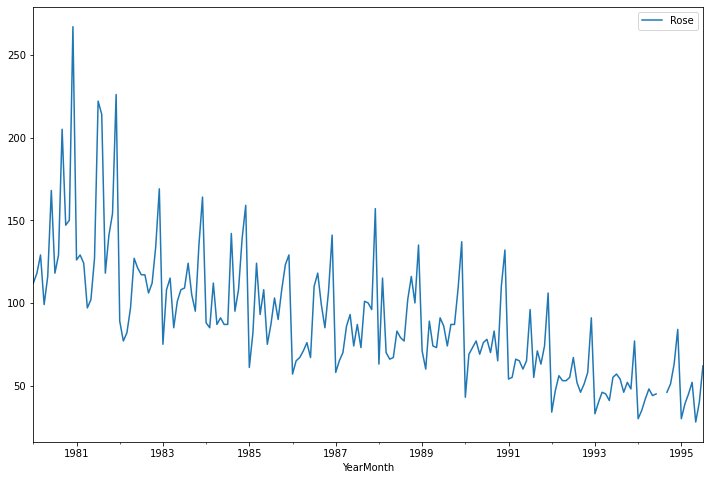

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df2.plot()
plt.show

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
df2.isnull().sum()

Rose    2
dtype: int64

In [11]:
df2=df2.interpolate(method='linear')


In [12]:
df2.isnull().sum()

Rose    0
dtype: int64

In [13]:
df2.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


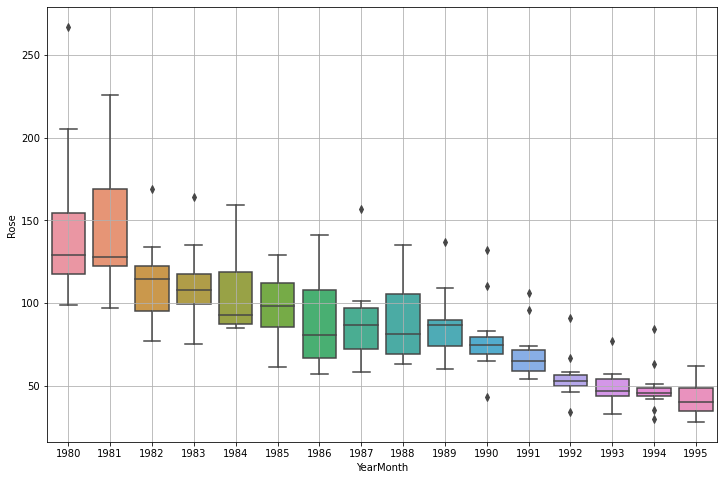

In [14]:
import seaborn as sns
sns.boxplot(x = df2.index.year,y = df2['Rose'])
plt.grid();

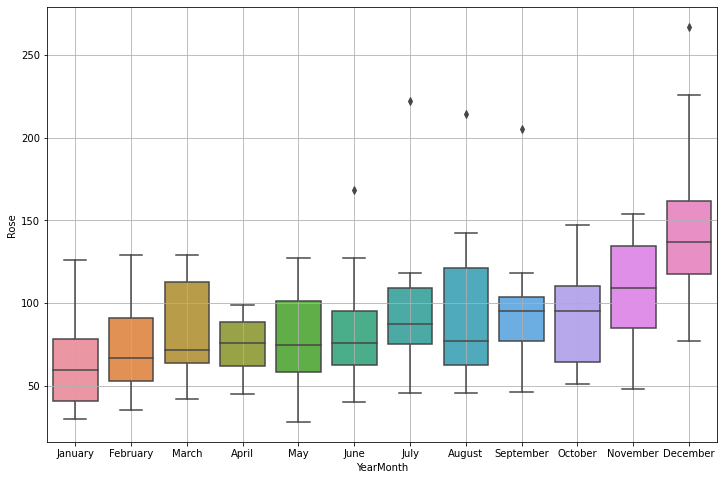

In [15]:
sns.boxplot(x = df2.index.month_name(),y = df2['Rose'])
plt.grid();

In [16]:
monthly_sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month, index = df2.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


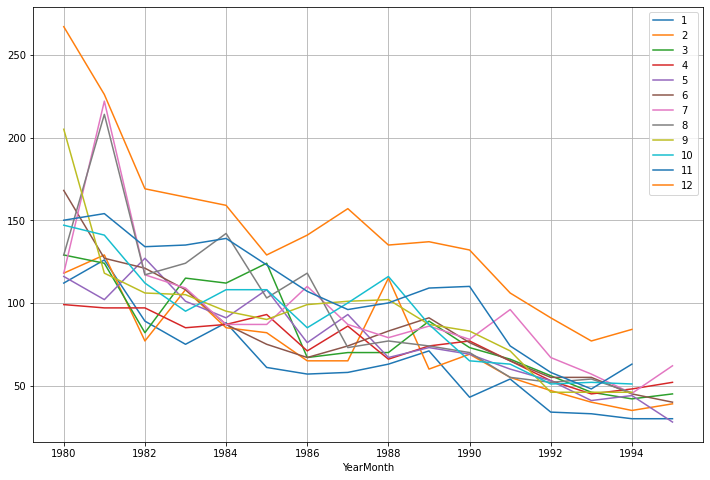

In [17]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

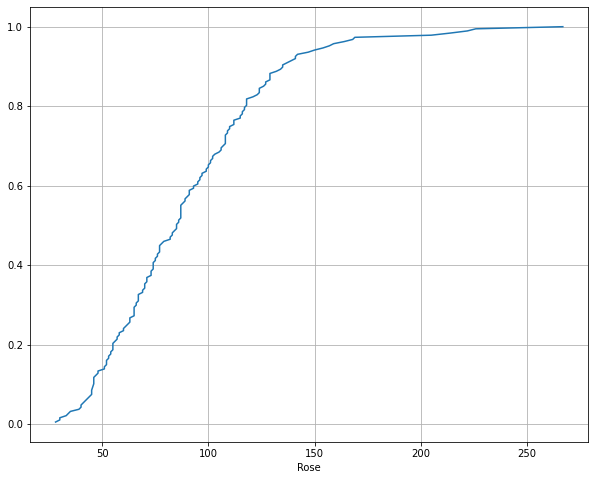

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 8))
cdf = ECDF(df2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

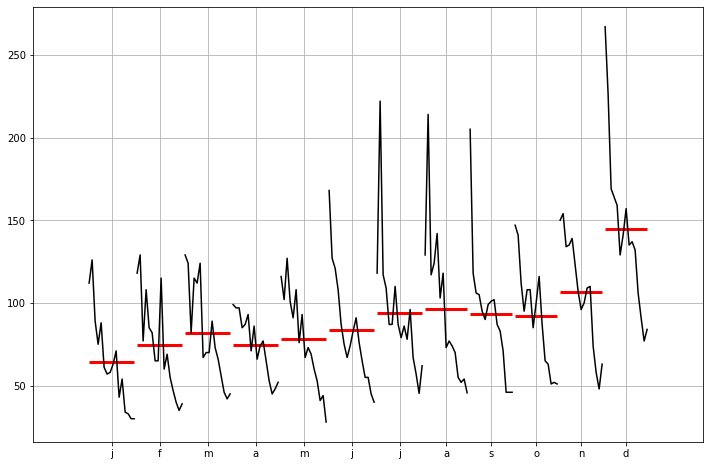

In [19]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df2['Rose'])
plt.grid();

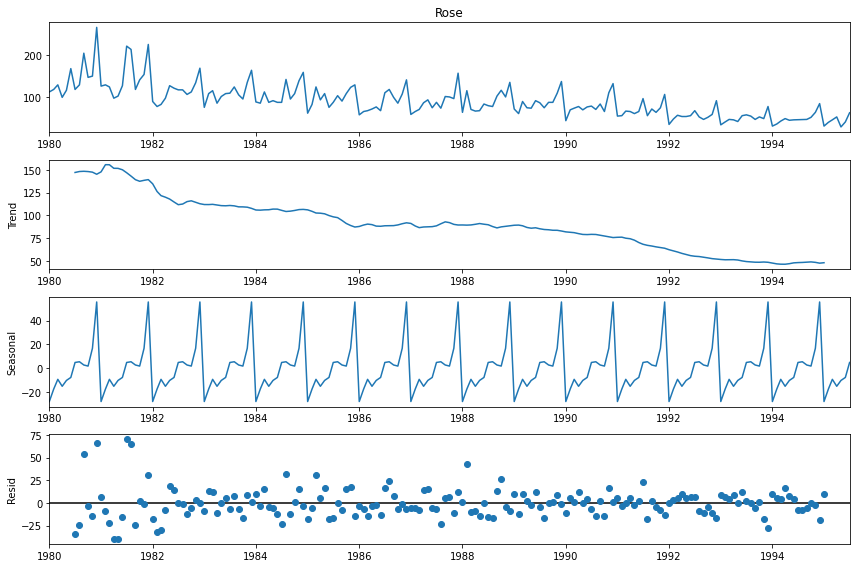

In [20]:
decomposition = seasonal_decompose(df2['Rose'],model='additive')
decomposition.plot();

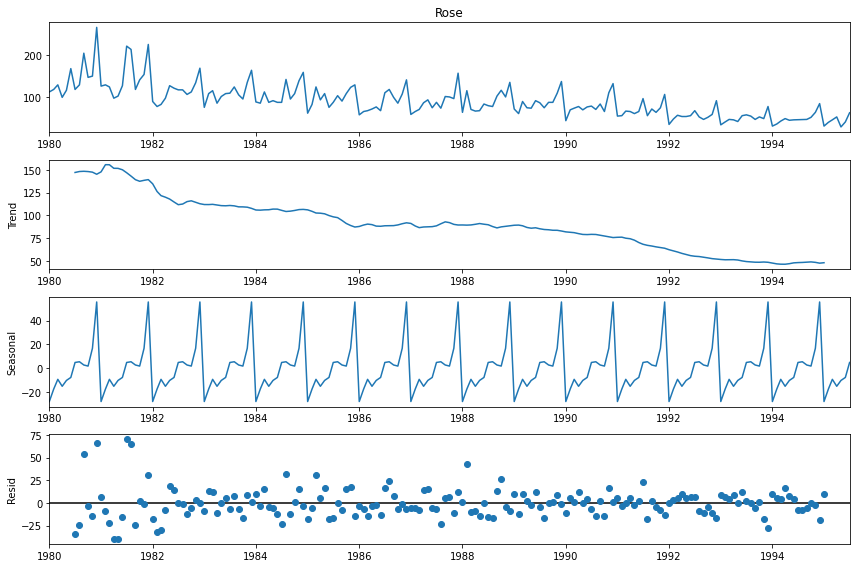

In [21]:
decomposition = seasonal_decompose(df2['Rose'],model='Multiplicative')
decomposition.plot();

### 3.Split the data into training and test. The test data should start in 1991.

In [22]:
train=df2[df2.index.year < 1991]
test=df2[df2.index.year >= 1991]

In [23]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [24]:
train=df2[0:int(len(df2)*0.7)] 
test=df2[int(len(df2)*0.7):]

In [25]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


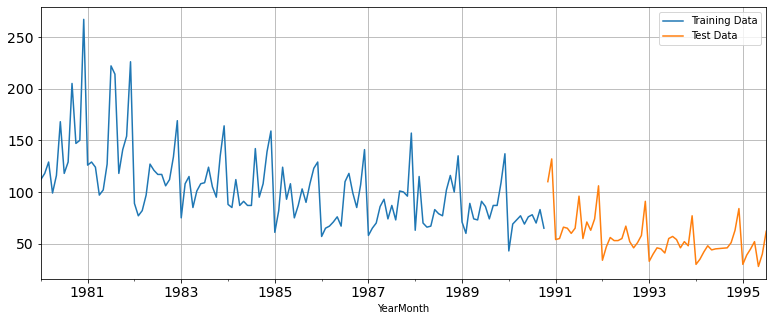

In [26]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [27]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [28]:
LinearRegression_train = train.copy()
LinearRegression_test= test.copy()

In [29]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time']  = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_test[['time']],LinearRegression_test['Rose'].values)

LinearRegression()

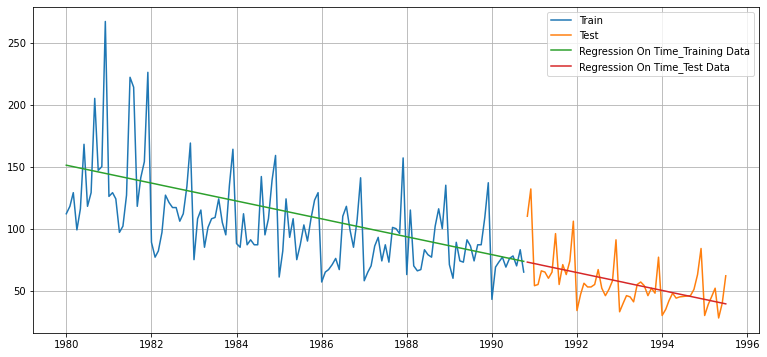

In [31]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [32]:
from sklearn import metrics

In [33]:
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 31.378


In [34]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.287


In [35]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,17.286999


In [36]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [37]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    65.0
1980-02-01    65.0
1980-03-01    65.0
1980-04-01    65.0
1980-05-01    65.0
Name: naive, dtype: float64

In [38]:
NaiveModel_test['naive'] = np.asarray(test['Rose'])[len(np.asarray(test['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-01    62.0
1990-12-01    62.0
1991-01-01    62.0
1991-02-01    62.0
1991-03-01    62.0
Name: naive, dtype: float64

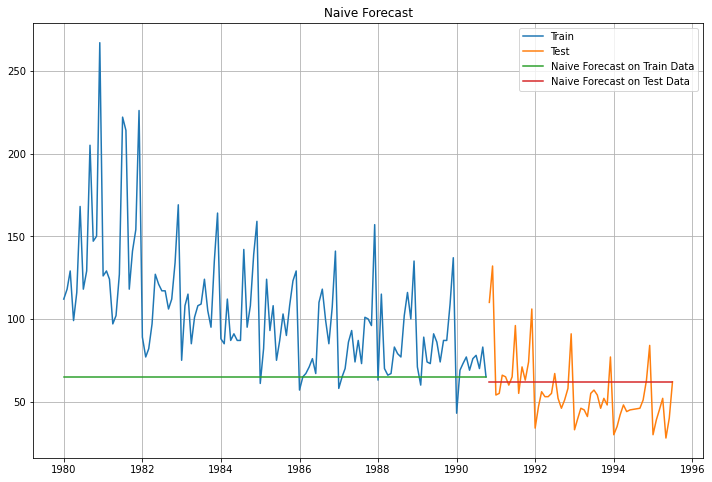

In [39]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(NaiveModel_test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [40]:
rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 53.740


In [41]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 20.738


In [42]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945


In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [44]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
YearMonth,,
1980-01-01,112.0,104.692308
1980-02-01,118.0,104.692308
1980-03-01,129.0,104.692308
1980-04-01,99.0,104.692308
1980-05-01,116.0,104.692308


In [45]:
SimpleAverage_test['mean_forecast'] = test['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1990-11-01,110.0,56.210526
1990-12-01,132.0,56.210526
1991-01-01,54.0,56.210526
1991-02-01,55.0,56.210526
1991-03-01,66.0,56.210526


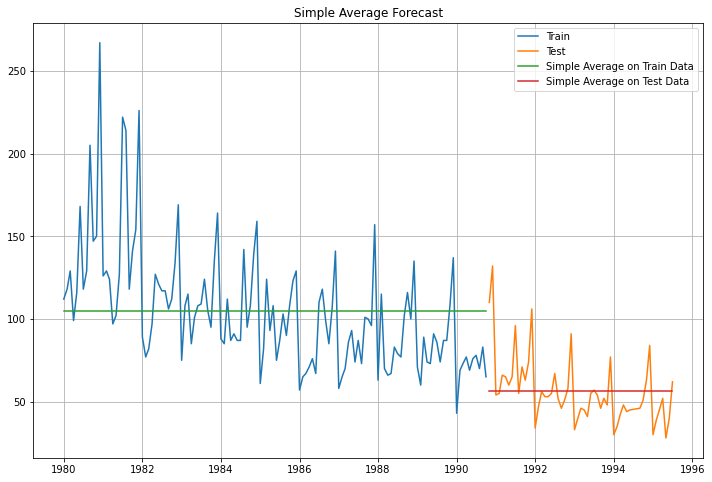

In [46]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [47]:
rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
print("For Simple Average forecast on the Train Data,  RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Train Data,  RMSE is 36.229


In [48]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 19.913


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422


In [50]:
MovingAverage = df2.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [51]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


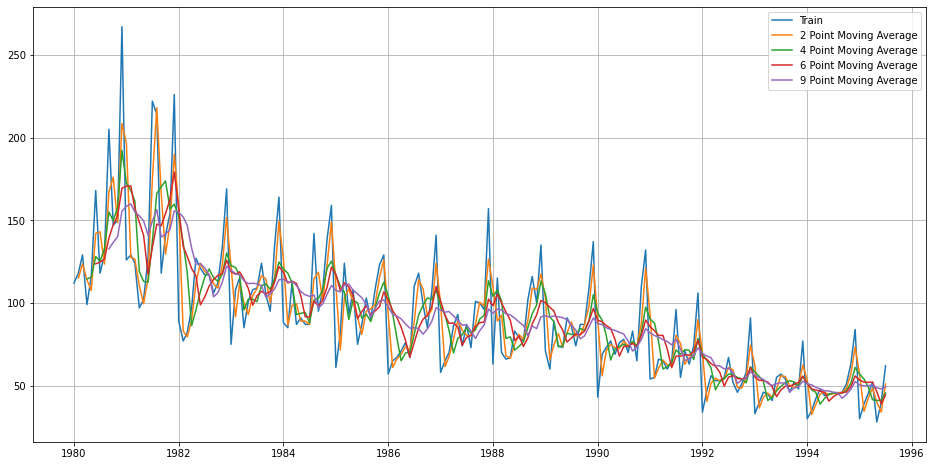

In [52]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label ='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label ='9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [53]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

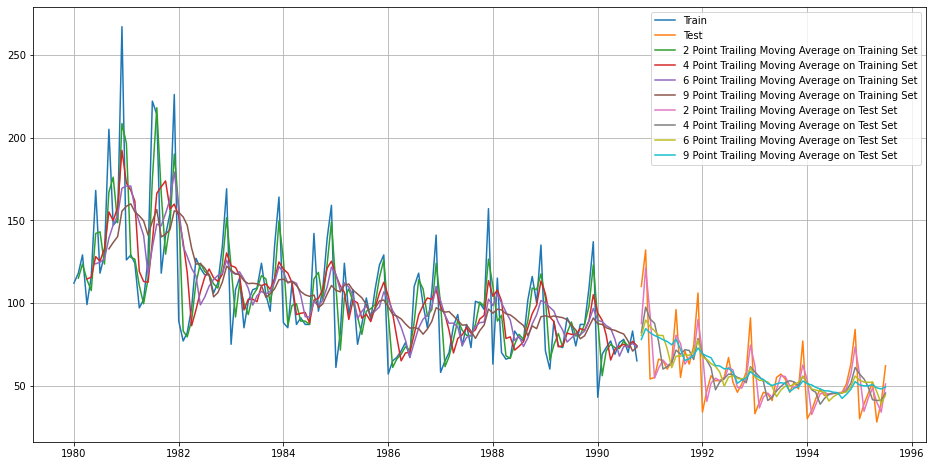

In [54]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label ='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label ='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label ='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label ='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [55]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 16.342 


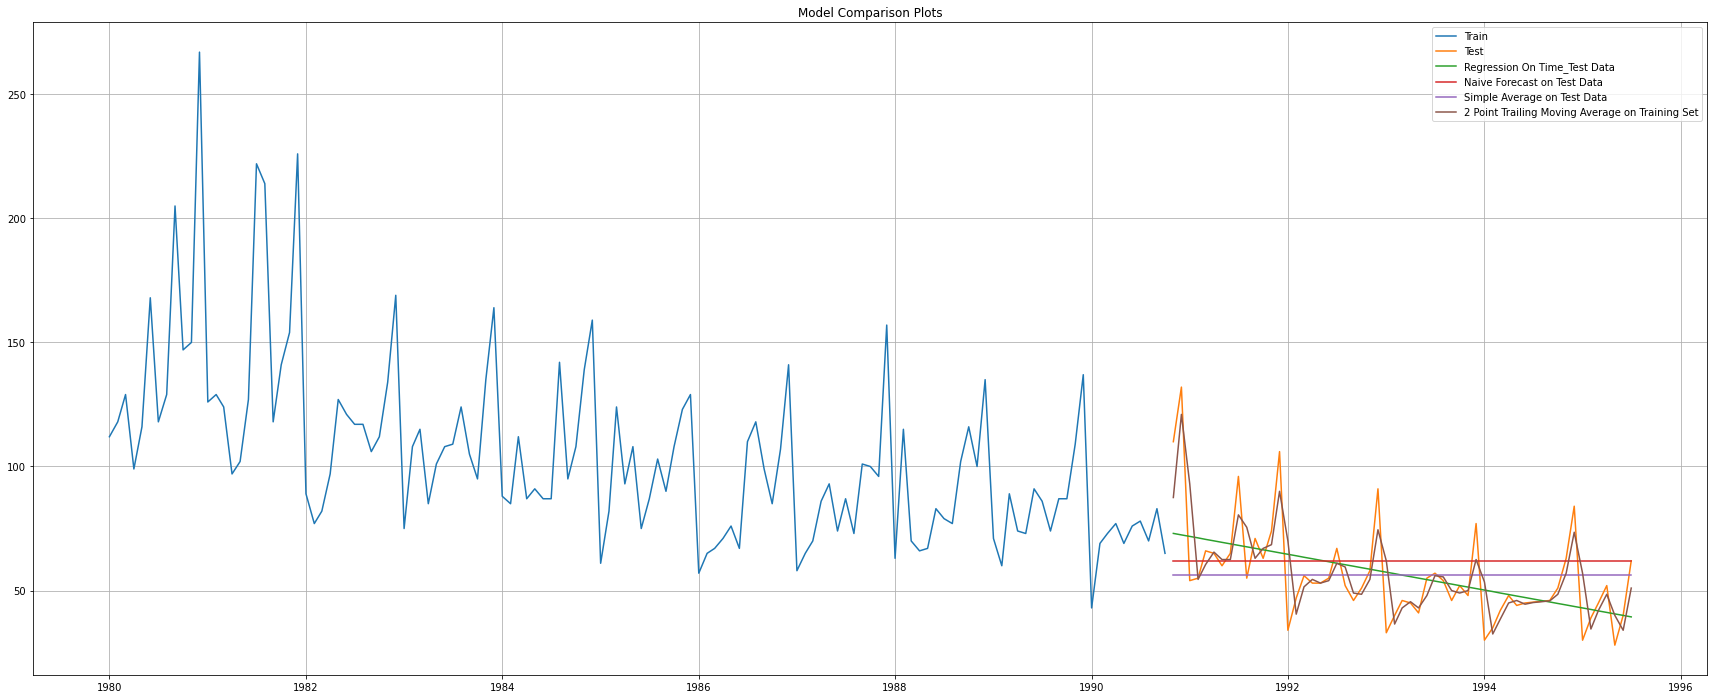

In [56]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919


In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [59]:
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [61]:
model_SES_autofit = model_SES.fit(optimized=True)

In [62]:
model_SES_autofit.params

{'smoothing_level': 0.10272100898511088,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.2627870419287,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
SES_train['predict'] = model_SES_autofit.forecast(steps=len(train))
SES_train.head()

,Rose,predict
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,NaN
1980-03-01,129.0,NaN
1980-04-01,99.0,NaN
1980-05-01,116.0,NaN


In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1990-11-01,110.0,78.899524
1990-12-01,132.0,78.899524
1991-01-01,54.0,78.899524
1991-02-01,55.0,78.899524
1991-03-01,66.0,78.899524


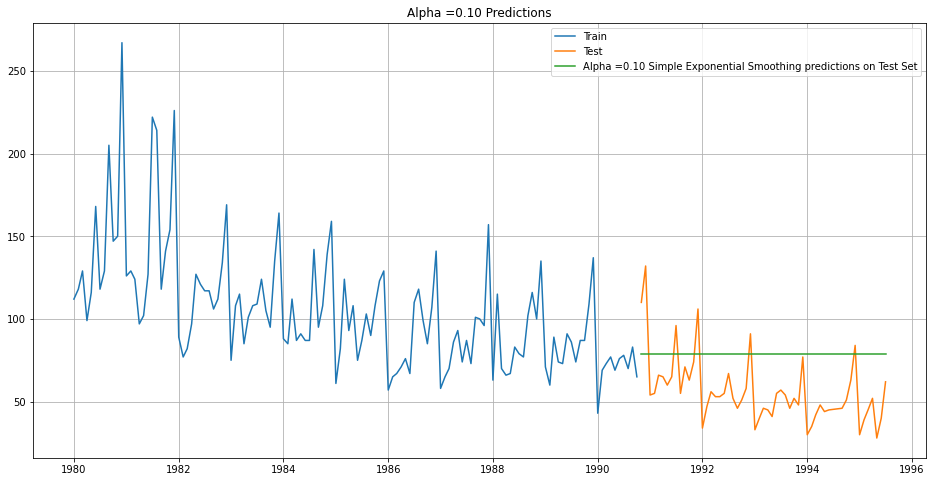

In [65]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.10 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.10 Predictions');

In [66]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.10 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.10 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 30.188


In [67]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.10,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326


In [68]:
DES_train = train.copy()
DES_test = test.copy()

In [69]:
model_DES = Holt(train,initialization_method='estimated')
model_DES=model_DES.fit()
print('')
print('==Holt model exponential smoothing estimated parameters ==')
print('')
print(model_DES.params)


==Holt model exponential smoothing estimated parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 7.755984441513712e-11, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 139.3527819489728, 'initial_trend': -0.5291705700335453, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
DES_train['predict']=model_DES.forecast(len(train))
DES_train.head()

,Rose,predict
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,NaN
1980-03-01,129.0,NaN
1980-04-01,99.0,NaN
1980-05-01,116.0,NaN


In [71]:
DES_predict=model_DES.forecast(len(test))
DES_predict.head()

1990-11-01    70.031437
1990-12-01    69.502267
1991-01-01    68.973096
1991-02-01    68.443926
1991-03-01    67.914755
Freq: MS, dtype: float64

Text(0.5, 1.0, 'DES Predictions')

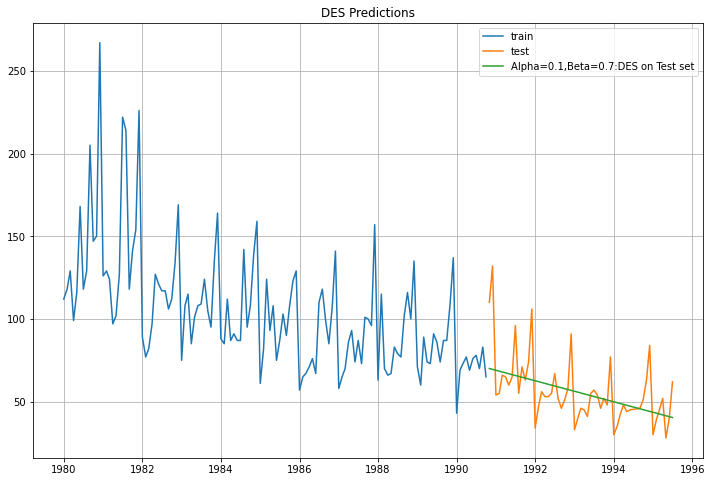

In [72]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='Alpha=0.1,Beta=0.7:DES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('DES Predictions')

In [73]:
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_predict,squared=False)
print("For Alpha=0.1,Beta=0.7 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))


For Alpha=0.1,Beta=0.7 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 17.356


In [74]:
resultsDf_6 = pd.DataFrame({'Test RMSE':[rmse_model6_test_1]}
                           ,index=['Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728


In [75]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES=model_TES.fit()
print('')
print('==Holt winters model exponential smoothing estimated parameters ==')
print('')
print(model_TES.params)


==Holt winters model exponential smoothing estimated parameters ==

{'smoothing_level': 0.0889188731139181, 'smoothing_trend': 4.656525272079209e-06, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 146.86076706887187, 'initial_trend': -0.5555953323059539, 'initial_seasons': array([-31.14573949, -18.77116887, -10.7601019 , -21.38589007,
       -12.55757961,  -7.09157308,   2.82817666,   8.93035772,
         4.94016583,   3.0419684 ,  19.65855714,  63.91429684]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [76]:
TES_predict=model_TES.forecast(len(train))
TES_predict.head()

1990-11-01     93.671645
1990-12-01    137.371789
1991-01-01     41.756157
1991-02-01     53.575132
1991-03-01     61.030603
Freq: MS, dtype: float64

In [77]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

1990-11-01     93.671645
1990-12-01    137.371789
1991-01-01     41.756157
1991-02-01     53.575132
1991-03-01     61.030603
Freq: MS, dtype: float64

Text(0.5, 1.0, 'TES Predictions')

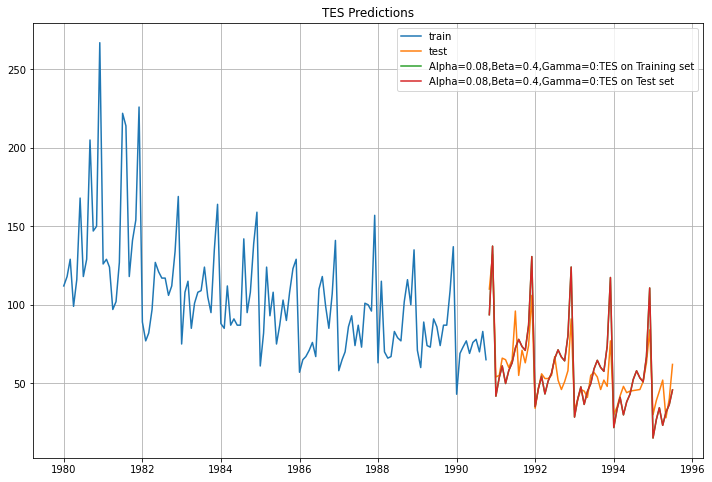

In [78]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='Alpha=0.08,Beta=0.4,Gamma=0:TES on Training set')
plt.plot(TES_predict,label='Alpha=0.08,Beta=0.4,Gamma=0:TES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('TES Predictions')

In [79]:
rmse_model7_test_1 = metrics.mean_squared_error(test.values,TES_predict,squared=False)
print("For Alpha=0.08,Beta=0.4,Gamma=0 TES additive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.08,Beta=0.4,Gamma=0 TES additive Model forecast on the Test Data, RMSE is 13.963


In [80]:
resultsDf_7 = pd.DataFrame({'Test RMSE':[rmse_model7_test_1]}
                           ,index=['Alpha=0.08,Beta=0.04,Gamma=0,TES Additive'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


In [81]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES=model_TES.fit()
print('')
print('==Holt winters model exponential smoothing estimated parameters ==')
print('')
print(model_TES.params)


==Holt winters model exponential smoothing estimated parameters ==

{'smoothing_level': 0.09954161352526007, 'smoothing_trend': 1.3336303508710234e-09, 'smoothing_seasonal': 1.2069328449342624e-07, 'damping_trend': nan, 'initial_level': 158.17849976224244, 'initial_trend': -0.6388610685846876, 'initial_seasons': array([0.69310878, 0.78335434, 0.8565105 , 0.75118137, 0.84323397,
       0.90831655, 0.99998662, 1.06934491, 1.00122429, 0.98484092,
       1.13241501, 1.56136821]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
TES_predict=model_TES.forecast(len(train))
TES_predict.head()

1990-11-01     86.307069
1990-12-01    118.002257
1991-01-01     51.939718
1991-02-01     58.202028
1991-03-01     63.090227
Freq: MS, dtype: float64

In [83]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

1990-11-01     86.307069
1990-12-01    118.002257
1991-01-01     51.939718
1991-02-01     58.202028
1991-03-01     63.090227
Freq: MS, dtype: float64

Text(0.5, 1.0, 'TES Predictions')

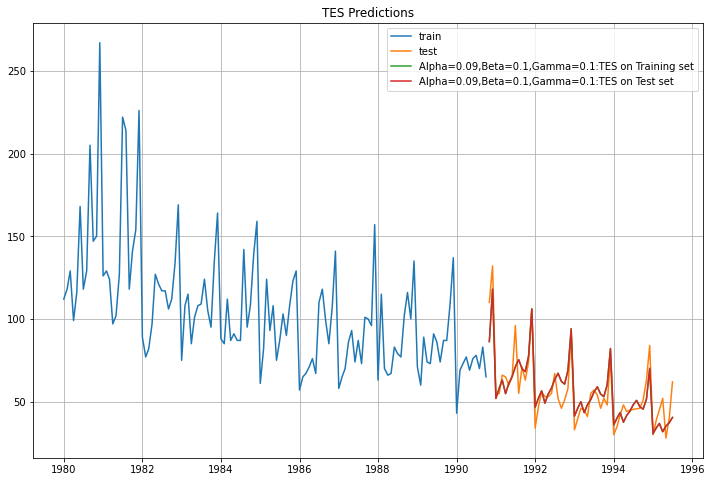

In [84]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='Alpha=0.09,Beta=0.1,Gamma=0.1:TES on Training set')
plt.plot(TES_predict,label='Alpha=0.09,Beta=0.1,Gamma=0.1:TES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('TES Predictions')

In [85]:
rmse_model8_test_1 = metrics.mean_squared_error(test.values,TES_predict,squared=False)
print("For Alpha=0.09,Beta=0.1,Gamma=0.1 TES Multiplicative Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

For Alpha=0.09,Beta=0.1,Gamma=0.1 TES Multiplicative Model forecast on the Test Data, RMSE is 9.325


In [86]:
resultsDf_8 = pd.DataFrame({'Test RMSE':[rmse_model8_test_1]}
                           ,index=['Alpha=0.09,Beta=0.1,Gamma=0.1,TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [87]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    

    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print ('Results of Dickey-Fuller Test:')
    df2test = adfuller(timeseries, autolag='AIC')
    df2output = pd.Series(df2test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df2test[4].items():
        df2output['Critical Value (%s)'%key] = value
    print (df2output,'\n')

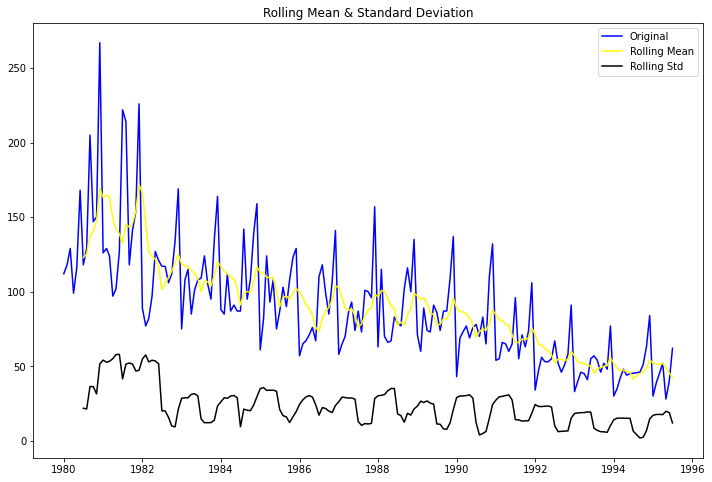

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [88]:
test_stationarity(df2['Rose'])

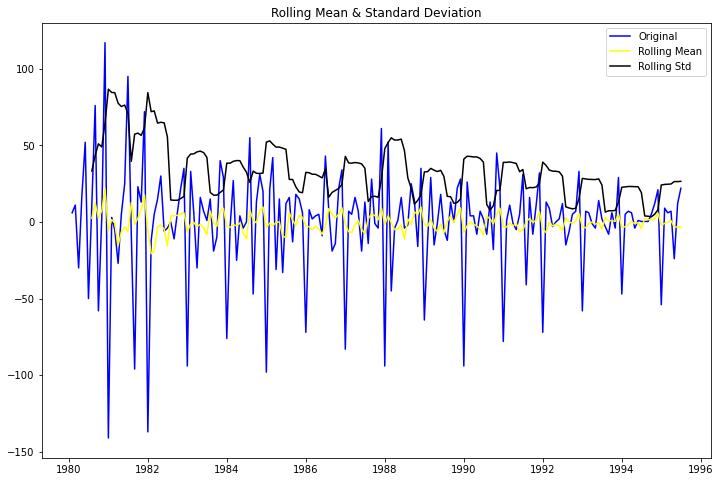

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [89]:
test_stationarity(df2['Rose'].diff().dropna())

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [90]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [91]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [92]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1315.1645929217334
ARIMA(0, 1, 1) - AIC:1258.0390519124783
ARIMA(0, 1, 2) - AIC:1254.7866807379003
ARIMA(1, 1, 0) - AIC:1299.0560243200787
ARIMA(1, 1, 1) - AIC:1255.6046191812957
ARIMA(1, 1, 2) - AIC:1255.2709074351403
ARIMA(2, 1, 0) - AIC:1280.0806971753814
ARIMA(2, 1, 1) - AIC:1256.8625945468966
ARIMA(2, 1, 2) - AIC:1257.2401826339938


In [93]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1254.786681
5,"(1, 1, 2)",1255.270907
4,"(1, 1, 1)",1255.604619
7,"(2, 1, 1)",1256.862595
8,"(2, 1, 2)",1257.240183
1,"(0, 1, 1)",1258.039052
6,"(2, 1, 0)",1280.080697
3,"(1, 1, 0)",1299.056024
0,"(0, 1, 0)",1315.164593


In [94]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  129
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -623.393
Method:                       css-mle   S.D. of innovations             29.847
Date:                Sun, 13 Nov 2022   AIC                           1254.787
Time:                        11:53:08   BIC                           1266.226
Sample:                    02-01-1980   HQIC                          1259.435
                         - 10-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5281      0.085     -6.222      0.000      -0.694      -0.362
ma.L1.D.Rose    -0.7780      0.100     -7.805      0.000      -0.973      -0.583
ma.L2.D.Rose    -0.2219      0.096     -2.31

In [95]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [96]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

17.428095225678792


In [97]:
resultsDf_9 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['ARIMA_AIC[0,1,2]'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


In [98]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [99]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [100]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.032318512245
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692059
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.166579524692
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497230209
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.2946512703303
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.255896654192
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887533698
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1242.5766056799905
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946451
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:904.3132399734251
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554863
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1035.724151027851
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142950299
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.5837355743876
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.6607999294733
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.3850768411606
SARIMA(0, 1, 2)x(0, 0, 0,

In [101]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",871.075238
53,"(1, 1, 2)","(2, 0, 2, 12)",873.003875
80,"(2, 1, 2)","(2, 0, 2, 12)",874.213962
69,"(2, 1, 1)","(2, 0, 0, 12)",879.792363
78,"(2, 1, 2)","(2, 0, 0, 12)",880.763857


In [102]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -428.538
Date:                            Sun, 13 Nov 2022   AIC                            871.075
Time:                                    11:53:46   BIC                            889.450
Sample:                                         0   HQIC                           878.516
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8367    239.175     -0.003      0.997    -469.611     467.937
ma.L2         -0.1633     39.038   

In [103]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [104]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,90.849106,15.914360,59.657534,122.040679
1,114.913416,16.150397,83.259221,146.567612
2,60.936673,16.150397,29.282477,92.590869
3,70.599289,16.150396,38.945094,102.253484
4,76.843515,16.150393,45.189326,108.497704


In [105]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

25.343324806306835


In [106]:
resultsDf_10 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['SARIMAX(0, 1, 2)x(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

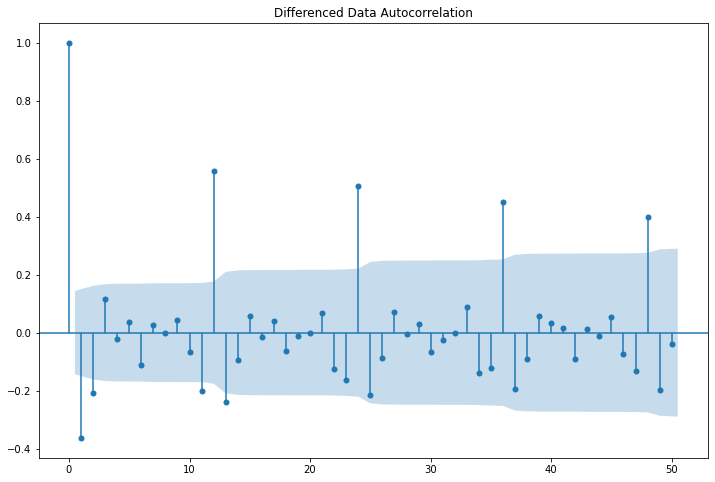

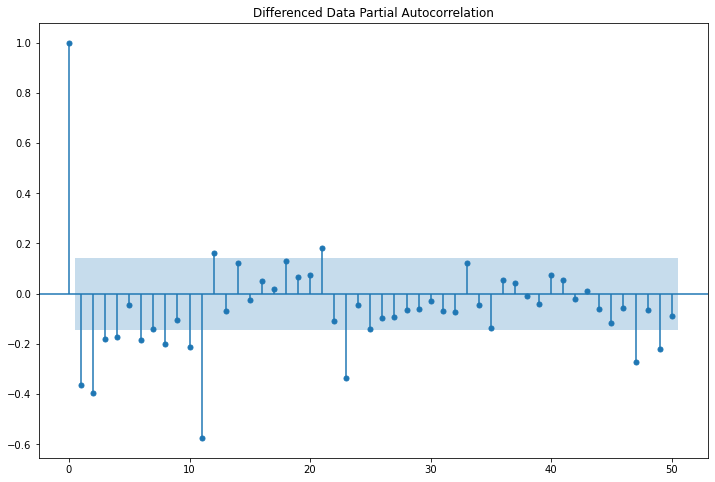

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [108]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  129
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -655.582
Method:                           css   S.D. of innovations             38.982
Date:                Sun, 13 Nov 2022   AIC                           1315.165
Time:                        11:53:47   BIC                           1320.884
Sample:                    02-01-1980   HQIC                          1317.489
                         - 10-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3643      3.432     -0.106      0.915      -7.091       6.363


In [109]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [110]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

17.808181121508674


In [111]:
resultsDf_11 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['ARIMA_ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


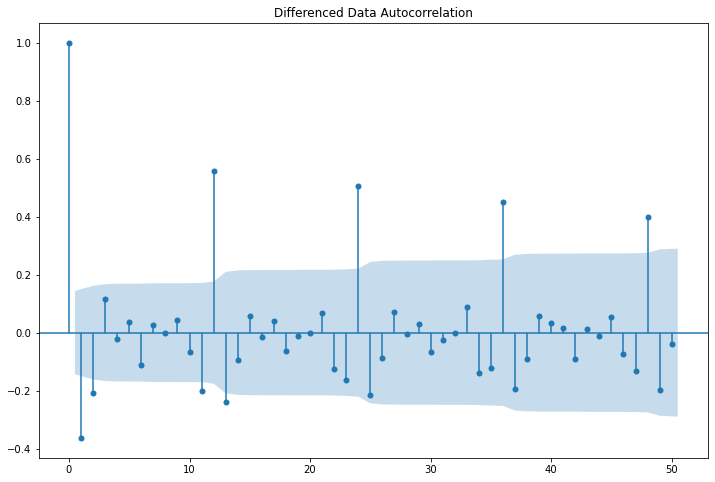

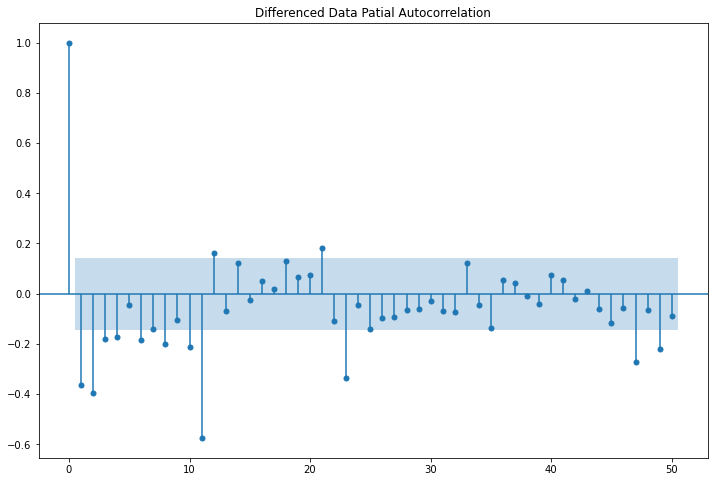

In [112]:
plot_acf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

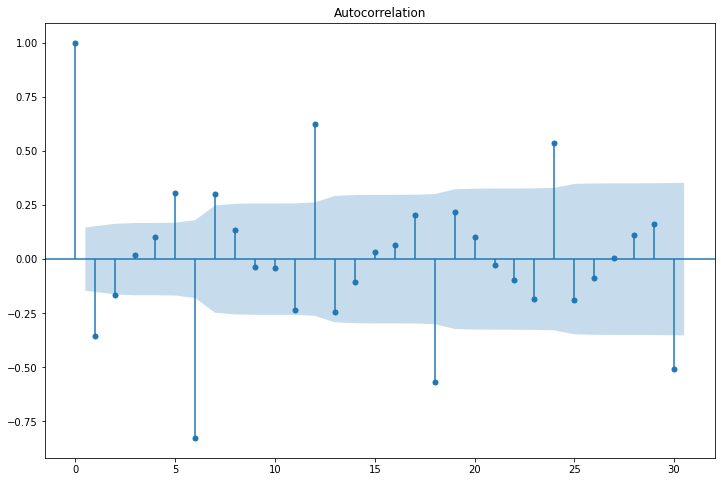

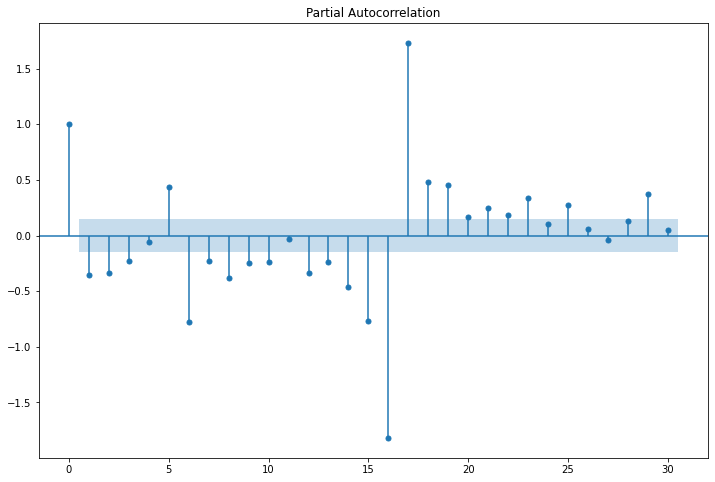

In [113]:
plot_acf((df2['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df2['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [114]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  130
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -469.371
Date:                                   Sun, 13 Nov 2022   AIC                            948.741
Time:                                           11:53:49   BIC                            961.963
Sample:                                                0   HQIC                           954.098
                                                   - 130                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.8592      0.036    -23.819      0.000    

In [115]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [116]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,76.781321,21.747939,34.156143,119.406499
1,102.734583,30.756231,42.453478,163.015688
2,35.883298,37.668536,-37.945676,109.712271
3,52.262435,43.495225,-32.986639,137.511509
4,55.382417,48.628701,-39.928086,150.692919


In [117]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

15.808075425169964


### 8.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [118]:
resultsDf_12 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['SARIMA_ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,17.286999
NaiveModel,20.737945
Simple Average,19.913422
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.10,SimpleExponentialSmoothing",30.188326
"Alpha=0.1,Beta=0.7,DoubleExponentialSmoothing",17.355728
"Alpha=0.08,Beta=0.04,Gamma=0,TES Additive",13.963361


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [119]:
full_data_model = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(0,1,0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood                -693.833
Date:                                 Sun, 13 Nov 2022   AIC                           1397.666
Time:                                         11:53:51   BIC                           1413.073
Sample:                                     01-01-1980   HQIC                          1403.921
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5172      0.058      8.870      0.000       0.403       0

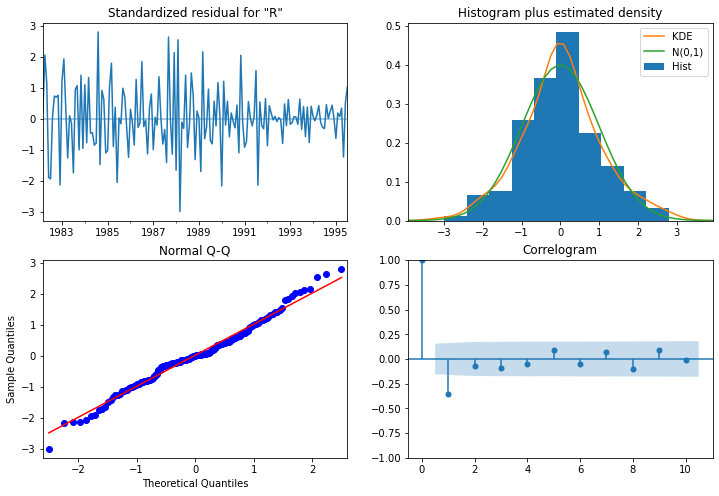

In [120]:
results_full_data_model.plot_diagnostics();

In [121]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)


In [122]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,57.499722,17.832537,22.548593,92.450852
1995-09-01,58.032293,25.219015,8.603931,107.460655
1995-10-01,59.791435,30.886860,-0.745697,120.328568
1995-11-01,67.071040,35.665073,-2.831220,136.973299
1995-12-01,85.384368,39.874764,7.231266,163.537470


In [123]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 29.728292423576985


In [124]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1991-01-01',end='1991-12-31', freq='M'))

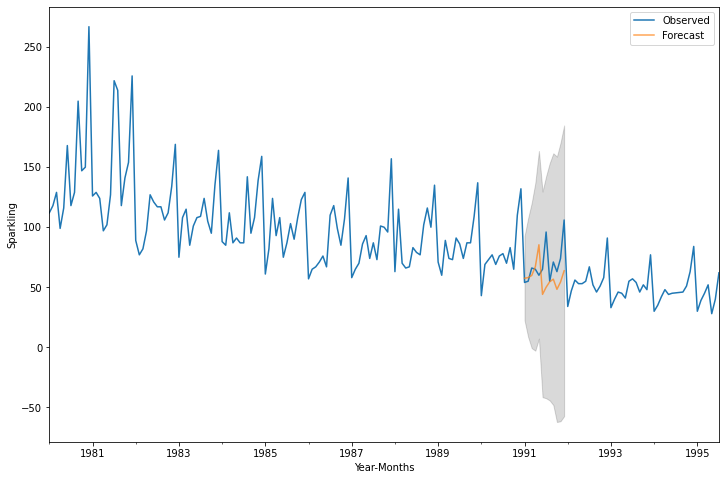

In [125]:
axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_data.index, pred_full_manual_SARIMA_data['mean_ci_lower'], 
                  pred_full_manual_SARIMA_data['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()